# Unsupervised Learning in Python(2) - Visualization with hierarchical clustering and t-SNE

## Visualizing hierarchies

### Hierarchical clustering of the grain data

In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grain_data = np.genfromtxt('Grains/seeds.csv', delimiter=',')
samples = grain_data[:, :7]
varieties = grain_data[:, 7]

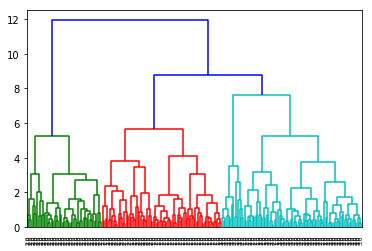

In [3]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


### Hierarchies of stocks

In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from sklearn.cluster.hierarchy, and PyPlot has been imported as plt.

In [4]:
stock_data = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
movements = stock_data.iloc[:, 1:].values
companies = stock_data.iloc[:, 0].values

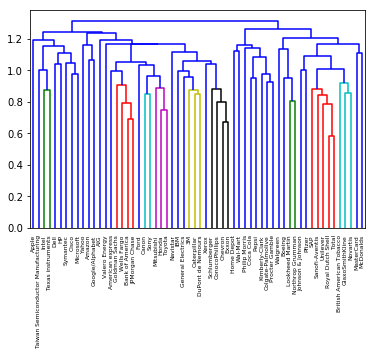

In [5]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()


## Cluster labels in hierarchical clustering

### Different linkage, different hierarchical clustering!

In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. This dataset was obtained from [Eurovision](https://eurovision.tv/history/full-split-results).

In [6]:
samples = np.genfromtxt('eurovision_samples.csv', delimiter=',')
country_names = np.array(['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenegro', 'Norway', 'Poland', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine', 'United Kingdom'])

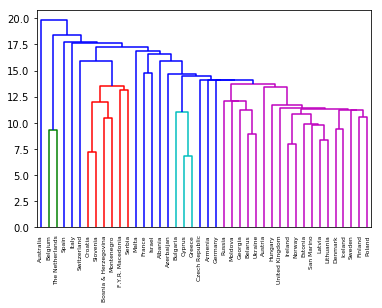

In [7]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()

### Extracting the cluster labels

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

In [8]:
grain_data = np.genfromtxt('Grains/seeds.csv', delimiter=',')
samples = grain_data[:, :7]
varieties = grain_data[:, 7]

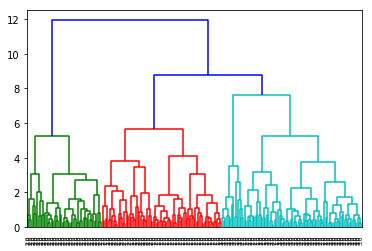

In [9]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()



In [10]:
# Perform the necessary imports
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  1.0  2.0  3.0
labels                  
1            0   47    0
2           52   23    0
3            1    0   13
4           17    0   57


In [11]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 8, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  1.0  2.0  3.0
labels                  
1            0   47    0
2           52   23    0
3           18    0   70


## t-SNE for 2-dimensional maps

### t-SNE visualization of grain dataset

In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

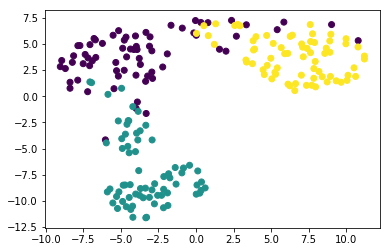

In [12]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=varieties)
plt.show()


### A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

In [13]:
stock_data = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
movements = stock_data.iloc[:, 1:].values
companies = stock_data.iloc[:, 0].values

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

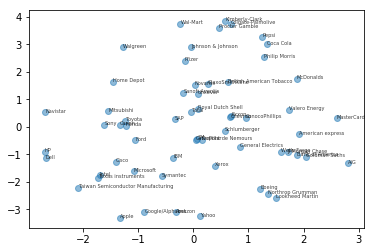

In [14]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
